# Project 3 - Part 1
- Author: Zainab Abu Taha

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import glob
files = glob.glob('/content/drive/MyDrive/AXSOSACADEMY/Chicago_Crime_2001-2022/Data/Chicago-Crime_*.csv')
df_list = []
for f in files:
    temp = pd.read_csv(f)
    df_list.append(temp)

df = pd.concat(df_list, ignore_index=True)

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.set_index('Date')

In [6]:
df = df[['Primary Type','Description','District','Arrest']]

In [7]:
daily_crime = df.resample('D').size()
daily_crime.name = 'Total Crimes'

## Topic 1) Comparing Police Districts


In [8]:
crime_2022 = df.loc['2022']
district_counts = crime_2022['District'].value_counts()

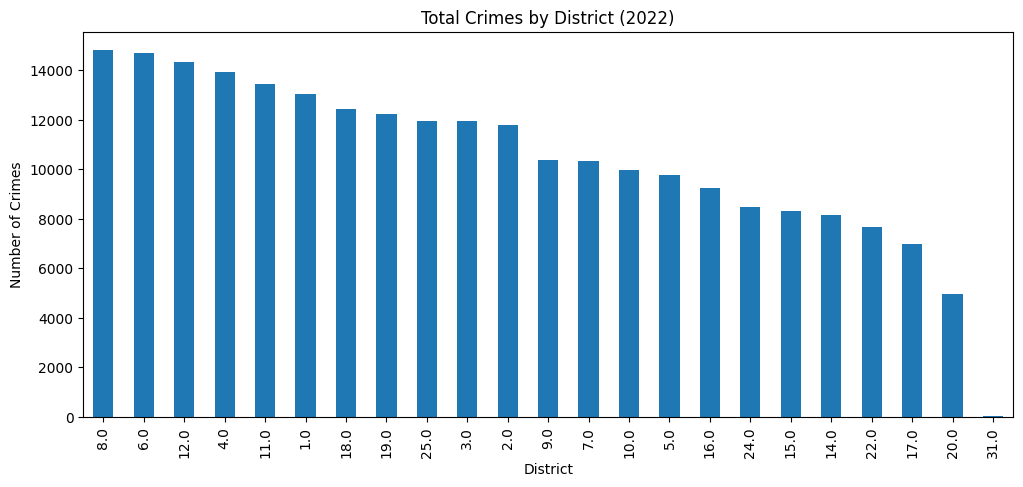

In [9]:
plt.figure(figsize=(12,5))
district_counts.plot(kind='bar')
plt.title('Total Crimes by District (2022)')
plt.ylabel('Number of Crimes')
plt.show()

In [10]:
district_counts.idxmax()
district_counts.idxmin()

np.float64(31.0)

- Which district had the most crimes in 2022?
   - Based on the visualization of total crimes by district in 2022, District 8 recorded the highest number of reported crimes. The bar chart clearly shows that District 8 stands above all other districts, indicating a significantly higher crime volume compared to the rest of the city.
- Which had the least?
   - District 31 had the lowest number of reported crimes in 2022. As shown in the chart, District 31 has a noticeably smaller bar than all other districts, indicating minimal crime activity relative to the rest of Chicago.


## Topic 2) Crimes Across the Years:



In [11]:
yearly_crime = df.resample('Y').size()
yearly_crime.index = yearly_crime.index.year

/tmp/ipython-input-109259781.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_crime = df.resample('Y').size()


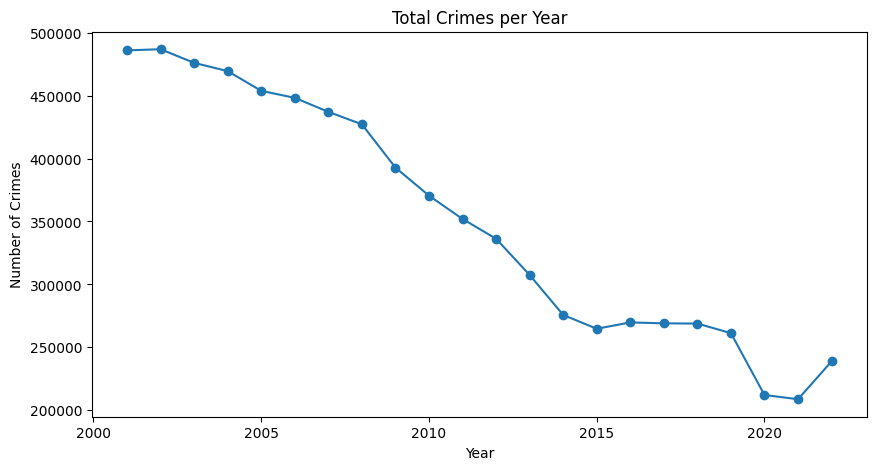

In [12]:
plt.figure(figsize=(10,5))
yearly_crime.plot(marker='o')
plt.title('Total Crimes per Year')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.show()

- Is the total number of crimes increasing or decreasing across the years?
   - The total number of reported crimes in Chicago shows a clear long-term decreasing trend across the years. As illustrated in the yearly crime trend visualization, crime levels were highest in the early 2000s and steadily declined over time, with a particularly sharp decrease after around 2008.

   - Although there is a slight increase in the most recent year shown, this uptick does not offset the overall downward trend observed across the two-decade period.

/tmp/ipython-input-2409291464.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  mvt_yearly = mvt.resample('Y').size()


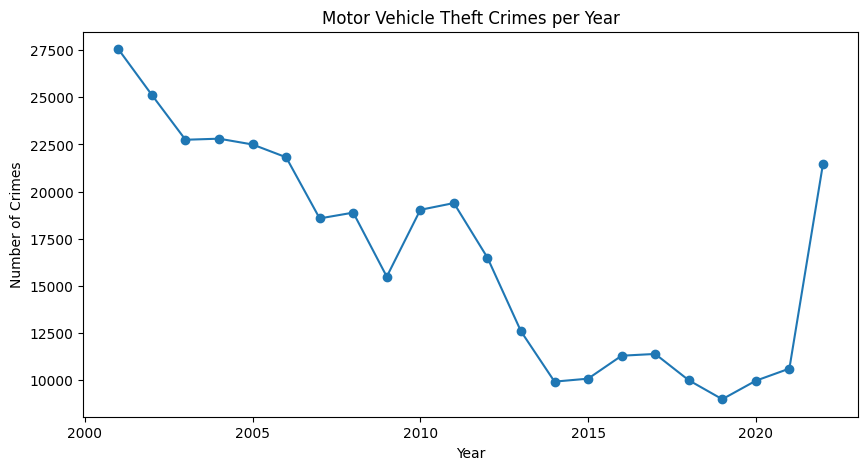

In [13]:
mvt = df[df['Primary Type'] == 'MOTOR VEHICLE THEFT']
mvt_yearly = mvt.resample('Y').size()
mvt_yearly.index = mvt_yearly.index.year
plt.figure(figsize=(10,5))
mvt_yearly.plot(marker='o')
plt.title('Motor Vehicle Theft Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
   - Yes. While the total number of crimes in Chicago shows a long-term decreasing trend, Motor Vehicle Theft demonstrates a different pattern. As shown in the visualization, motor vehicle thefts generally declined from the early 2000s through the mid-2010s, but have increased sharply in recent years, particularly after 2020.

## Topic 3) Comparing AM vs. PM Rush Hour:


In [14]:
df['hour'] = df.index.hour

In [15]:
am_rush = df[(df['hour'] >= 7) & (df['hour'] <= 10)]
pm_rush = df[(df['hour'] >= 16) & (df['hour'] <= 19)]

In [16]:
am_top5 = am_rush['Primary Type'].value_counts().head(5)
pm_top5 = pm_rush['Primary Type'].value_counts().head(5)

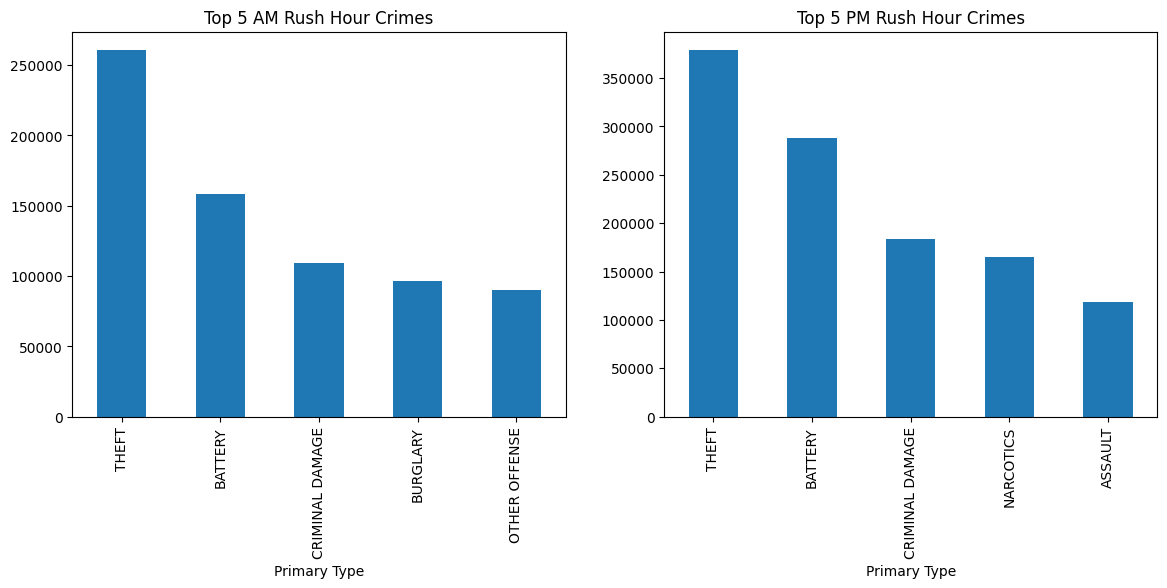

In [17]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

am_top5.plot(kind='bar', ax=ax[0], title='Top 5 AM Rush Hour Crimes')
pm_top5.plot(kind='bar', ax=ax[1], title='Top 5 PM Rush Hour Crimes')

plt.show()

In [18]:
am_mvt = am_rush[am_rush['Primary Type']=='MOTOR VEHICLE THEFT'].shape[0]
pm_mvt = pm_rush[pm_rush['Primary Type']=='MOTOR VEHICLE THEFT'].shape[0]

am_mvt, pm_mvt

(54035, 74678)

- What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
   - Crimes are more common during PM rush hour (4 PM – 7 PM) than during AM rush hour (7 AM – 10 AM). As shown in the visualizations, the total number of reported crimes across the top categories is consistently higher in the PM period, indicating increased criminal activity later in the day.
   - The five most common crimes during AM rush hour are:Theft, Battery, Criminal Damage, Burglary, Other Offense
   - During PM rush hour, the top five most common crimes are:Theft, Battery, Criminal Damage, Narcotics, Assault
- Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
   - Motor vehicle thefts are significantly more common during PM rush hour. The analysis shows 74,678 motor vehicle thefts occurring during PM rush hour compared to 54,035 incidents during AM rush hour. This indicates that vehicle thefts are more likely to occur later in the day, possibly due to increased vehicle availability and reduced supervision in the evening hours.